In [4]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

In [5]:
df=sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0

In [8]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [10]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


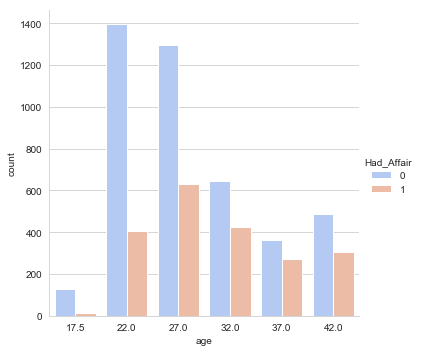

In [17]:
sns.catplot(x='age',hue='Had_Affair',data=df,kind='count',palette='coolwarm')

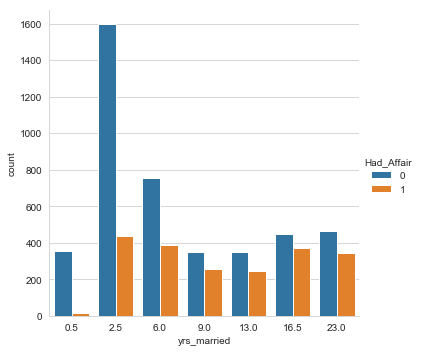

In [18]:
sns.catplot('yrs_married',data=df,hue='Had_Affair',kind='count')

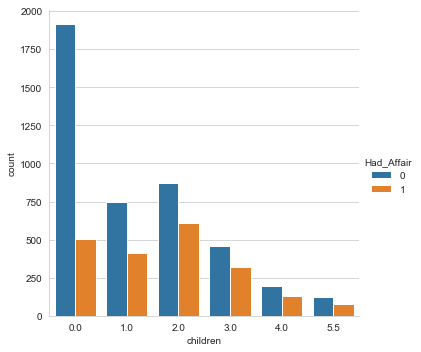

In [19]:
sns.catplot('children',data=df,hue='Had_Affair',kind='count')

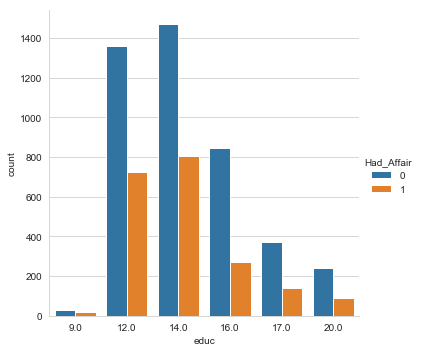

In [20]:
sns.catplot('educ',data=df,hue='Had_Affair',kind='count')

In [21]:
occ_dummies = pd.get_dummies(df['occupation'])

In [22]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [23]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [40]:
occ_dummies.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [36]:
hus_occ_dummies.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [37]:
X=df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [38]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [41]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [42]:
X=pd.concat([X,dummies],axis=1)

In [46]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,0,1,0,0


In [47]:
Y=df.Had_Affair

Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [48]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,0,1,0,0


In [49]:
X=X.drop('hocc1',axis=1)

In [50]:
X=X.drop('affairs',axis=1)

In [52]:
X.head()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [53]:
Y=np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0])

In [54]:
log_model=LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

0.7258875274897895

In [55]:
Y.mean()

0.3224945020420987

In [56]:
coeff_df=DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [57]:
coeff_df

,0,1
0,rate_marriage,[-0.6978455096539518]
1,age,[-0.05633632456391041]
2,yrs_married,[0.10389299187350667]
3,children,[0.01818532144142296]
4,religious,[-0.3685066403819364]
5,educ,[0.008647374145728168]
6,occ2,[0.2981188865493084]
7,occ3,[0.6081502910503018]
8,occ4,[0.3465112689847115]
9,occ5,[0.9422595517777723]


In [58]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [59]:
log_model2=LogisticRegression()
log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
class_predict=log_model2.predict(X_test)

In [61]:
print metrics.accuracy_score(Y_test,class_predict)

0.7160804020100503
